In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load(box, snap, axis, res, filename, dirname = 'fiducial'):
    base = '/lustre/cosinga/hcolor/output/'
    path = '%s%s_%sB_%03dS_%dA_%dR/results/'%(base, dirname, box, snap, axis, res)
    filepath = '%s%s_%sB_%03dS_%dA_%dR.pkl_rlib.pkl'%(path, filename, box, snap, axis, res)
    f = pkl.load(open(filepath, 'rb'))
    return f

In [3]:
flibog = FigureLibrary()
box = 'tng100'
snaps = [99, 67]
axis = 0
res = 800
files = ['ptlgrid', 'galaxygrid', 'hiptlgrid', 'vngrid']
for f in files:
    for s in snaps:
        flibog.addResults(load(box, s, axis, res, f))
        

# ptl-bias space/redshift comparison

['real', 'redshift']
['dm', 'gas', 'ptl', 'stmass']


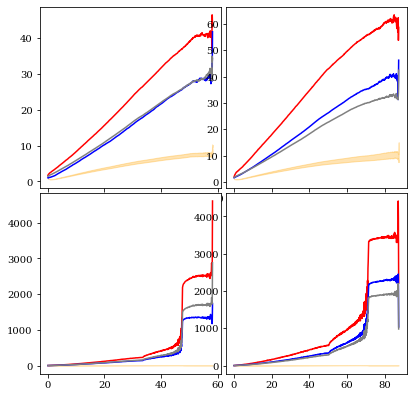

In [10]:
flib = copy.copy(flibog)
spaces = flib.getPropVals('space')

flib.createFigGrid(len(spaces), len(snaps), panel_length = 2.5)
dim = flib.getDim()
fig, panels = flib.getFig()
ip = {}
# ip['is_particle'] = True
# ip['color'] = ['red', 'blue', 'resolved']
ip['color_cut'] = ['0.60', 'None']
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
ip['fieldname'] = 'galaxy'
print(spaces)

hip = {}
hip['is_hydrogen'] = True
hip['is_particle'] = True

pip = {}
pip['fieldname'] = 'ptl'
pip['species'] = 'ptl'
figarr = np.empty(dim, dtype = object)
flib.setResultArray(figarr, 'space', 'redshift', 'color')
print(flib.getPropVals('species'))

cdict = {'red':'red', 'blue':'blue', 'resolved':'gray'}
labdict = {'red':'Red Galaxies', 'blue':'Blue Galaxies', 'resolved':'All Galaxies'}
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        ip['space'] = spaces[i]
        ip['color'] = ['red', 'blue', 'resolved']
        ip['snapshot'] = snaps[j]
        hip['space'] = spaces[i]
        hip['snapshot'] = snaps[j]
        pip['space'] = spaces[i]
        pip['snapshot'] = snaps[j]
        gals = flib.getMatchingResults(ip, {})
        HIs = flib.getMatchingResults(hip, {})
        ptl = flib.getMatchingResults(pip, {})
        print(ptl)
        flib.addObsBias(idx, gals + HIs, ptl[0])
        for c in ip['color']:
            lkw = {'color' : cdict[c], 'label':labdict[c]}
            ip['color'] = c
            flib.plotLine(idx, ip, line_kwargs = lkw)
        
        fkw = {}
        fkw['color'] = 'orange'
        fkw['label'] = 'HI'
        flib.plotFill(idx, hip, fill_kwargs = fkw)

In [11]:
redshifts = flib.getPropVals('redshift')
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y')
flib.matchAxisLimits()

# ticks

flib.removeDefaultTickLabels()
flib.changeTickParams()

#labels
lkw = {}
lkw['loc'] = 'upper left'
flib.addLegend((1,1), lkw)
flib.axisLabel('y', r"b (k) = $\sqrt{\rm{P}_{\rm{sample}} / P_{\rm{m}}}$")

flib.axisLabel('x')
redshifts = ["z = %.1f"%z for z in redshifts]
flib.rowLabels(['Real Space', 'Redshift Space'], pos = (0.05, 0.5))
flib.colLabels(redshifts)

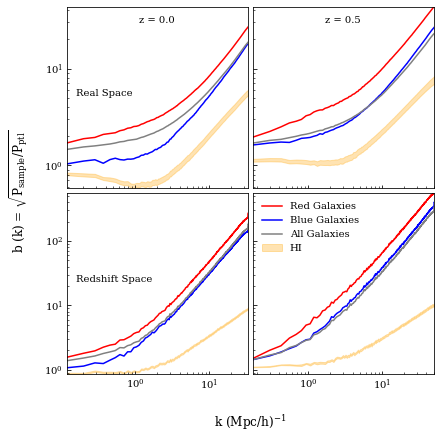

In [12]:
fig

In [13]:
fig.savefig('spaceR_redshiftC_color-fieldname_ptlbias.pdf')

# Redshift Evolution

In [ ]:
flib = copy.copy(flibog)
spaces = flib.getPropVals('space')

flib.createFigGrid(4, len(spaces), panel_length = 2.5)
dim = flib.getDim()
fig, panels = flib.getFig()
ip = {}
# ip['is_particle'] = True
# ip['color'] = ['red', 'blue', 'resolved']
ip['color_cut'] = ['0.60', 'None']
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
ip['fieldname'] = 'galaxy'
print(spaces)

hip = {}
hip['is_hydrogen'] = True
hip['is_particle'] = True

pip = {}
pip['fieldname'] = 'ptl'
pip['species'] = 'ptl'
figarr = np.empty(dim, dtype = object)
flib.setResultArray(figarr, 'color', '', 'redshift')

for i in range(dim[0]):
    for j in range(dim[1]):
